# Week 6: Adult Income Dataset


---

## Import Libraries

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [308]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/feliciastevany/DataMiningW2/refs/heads/main/adult-income.csv') # Read the csv dataset
# Rename columns for readability, as column names seem to have extra spaces and unusual column name
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
               'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'] # Change the name of the columns
df.sample(10) # Showing 10 random sample rows of the dataset

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
991,50,Self-emp-not-inc,124793,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K
28507,35,Private,117381,Bachelors,13,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
11427,61,Federal-gov,160155,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30864,30,Self-emp-not-inc,113838,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,3137,0,60,Germany,<=50K
30533,33,Private,87310,9th,5,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,50,United-States,<=50K
22913,52,Private,443742,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
32006,52,Private,208630,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,1741,38,United-States,<=50K
21522,52,Self-emp-inc,89041,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K
27800,47,State-gov,160045,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13268,35,Private,292185,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


## Exploratory Data Analysis

2. Display the info column

In [309]:
#2
df.info() # Showing the info of all the column including datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


3. Show describe column

In [310]:
#3
description = df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].describe().round(1)
description # showing the description of the column

# The table displays statistical summaries of six attributes: age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week for 3256 samples.
# As shown, all the columns have the same count that is 3256 datas.
# From the data, the feature with the highest range is fnlegt, with a range from 12285 to 1484705.
# On the other hand, the feature with the lowest range is education_num, which ranges from 1 mm to 16.

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.0,32560.0,32560.0,32560.0,32560.0,32560.0
mean,38.6,189781.8,10.1,1077.6,87.3,40.4
std,13.6,105549.8,2.6,7385.4,403.0,12.3
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117831.5,9.0,0.0,0.0,40.0
50%,37.0,178363.0,10.0,0.0,0.0,40.0
75%,48.0,237054.5,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0


4. display the number of each unique value in income column

In [311]:
#4
# Showing the number of unique value on categorical column which is income (target column)
sex_counts = df['income'].value_counts(dropna=False)
print(sex_counts)

# Number of people with income <=50K is much higher than number of people with income >50K.

income
<=50K    24719
>50K      7841
Name: count, dtype: int64


5. Null handling

In [312]:
#5
missing = df.isnull().sum() # check if there is still a null values
missing # showing the number of missing value

# Result
# There is no any missing values on every columns. It means all the columns has it value.

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


6. Visualization

<ipython-input-313-b253f7fc0585>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette="pastel")


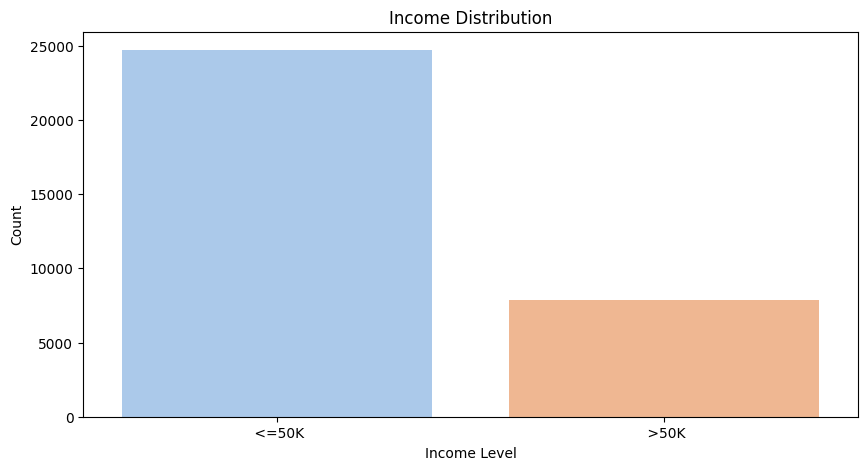

In [313]:
#6
# Bar Chart of Income Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='income', data=df, palette="pastel")
plt.title("Income Distribution")
plt.xlabel("Income Level")
plt.ylabel("Count")
plt.show()

# Conclusion
# The bar chart shows 2 categories of income in this dataset: income <=50K and income >50K. The result shows that total number of people earning smaller than 50K
# falls within the range of 20000-25000 cases. On the other hand, the total number of people earning bigger than 50K is significantly lower, ranging from 5000-10000 cases.
# This indicates a larger portion of the dataset represents individuals with income <=50K compared to those earning >50K.

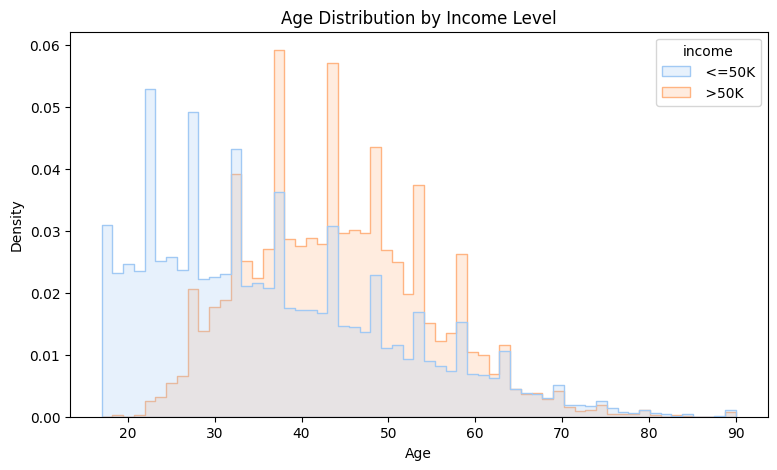

In [314]:
# Plot 2: Age Distribution by Income Level
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x='age', hue="income", element="step", stat="density", common_norm=False, palette="pastel")
plt.title("Age Distribution by Income Level")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# Conclusion
# The graph shows how the age distribution differs between people with incomes below and above 50K. We can see that both groups have a similar distribution with
# a peak around the age of 40. However, the graph also shows that there are more people with incomes above 50K in the older age groups (60 and above).
# This suggests that age could be a factor in determining income level, with older individuals being more likely to have higher incomes.

7. Check unique value of our target variable

In [315]:
#7
unique_values = df['income'].unique() # Checking unique values in income column
print(unique_values) # Showing unique values in income column

[' <=50K' ' >50K']


8. encode categorical columns and display the results

In [316]:
#8
encoder = LabelEncoder() # create a LabelEncoder to encode the categorical columns

# apply lable encoding to specific categorical columns
df['workclass'] = encoder.fit_transform(df['workclass'])
df['education'] = encoder.fit_transform(df['education'])
df['marital_status'] = encoder.fit_transform(df['marital_status'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['relationship'] = encoder.fit_transform(df['relationship'])
df['race'] = encoder.fit_transform(df['race'])
df['sex'] = encoder.fit_transform(df['sex'])
df['native_country'] = encoder.fit_transform(df['native_country'])

df.head() # showing the first 5 encoded columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K


9. encode the target column and display the results

In [317]:
#9
# apply label encoding to the target column (income)
df['income'] = encoder.fit_transform(df['income']) # 0 for >=50K and 1 for <50K

df.head(5) # showing the random encoded columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


10. create a heatmap to see the correlation and explain the conclusion

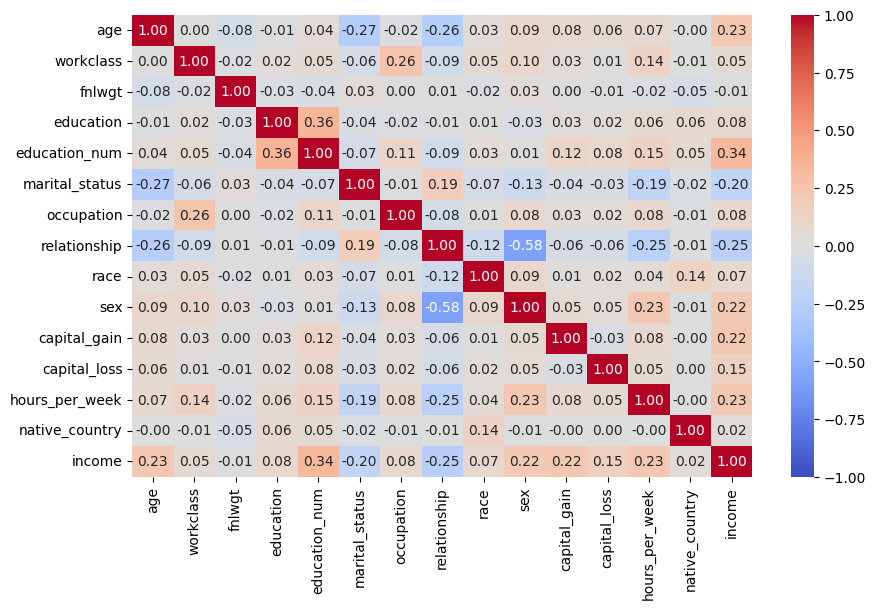

In [318]:
#10
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('')

plt.show() #Showing the heatmap result

# Conclusion
# The heatmap displays the correlation matrix for a dataset containing information about income levels. There are strong positive correlations between variables like education and education_num.
# Weak Correlations with Income, which is likely the target variable, shows relatively weak correlations with most other variables.
# Negative Correlation with marital_status that has a negative correlation with income. This might indicate that certain marital statuses are associated with lower income levels on average.
# However, income, which is what we want to predict, doesn't have a strong relationship with any single thing.

## Machine Learning

1. Splitting X and y

In [319]:
#1
# X is the predicting variable, and y is the predicted variable (target)
X = df.drop(['income'], axis = 1)
y = df['income']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [320]:
#2
# Splitting the data to traning and test using train test, with test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [321]:
#3
# Checking how many rows and columns in each train and test data
X_train.shape, X_test.shape

((26048, 14), (6512, 14))

## Desicion Tree


---

1. Criterion Entropy

Defining the model

In [322]:
#Criterion Entropy
# Modelling using criterion entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the test set results

In [323]:
# Predict X-test with creation entropy model
y_pred_entropy = clf_entropy.predict(X_test)

Acurracy Score

In [324]:
# Accuracy score using y_test and y_pred
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Model accuracy score with criterion entropy: {accuracy_entropy * 100:.2f}%") # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion entropy: 83.86%


Check for overfitting and underfitting

In [325]:
y_train_entropy = clf_entropy.predict(X_train)

# Accuracy for test and train using creation entropy model
test_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
training_accuracy_entropy = accuracy_score(y_train, y_train_entropy)

# Showing testing and training accuracy based on train and test data
print(f"Testing accuracy: {test_accuracy_entropy * 100:.2f}%")
print(f"Testing accuracy: {training_accuracy_entropy * 100:.2f}%")

Testing accuracy: 83.86%
Testing accuracy: 84.01%


Visualize decision trees

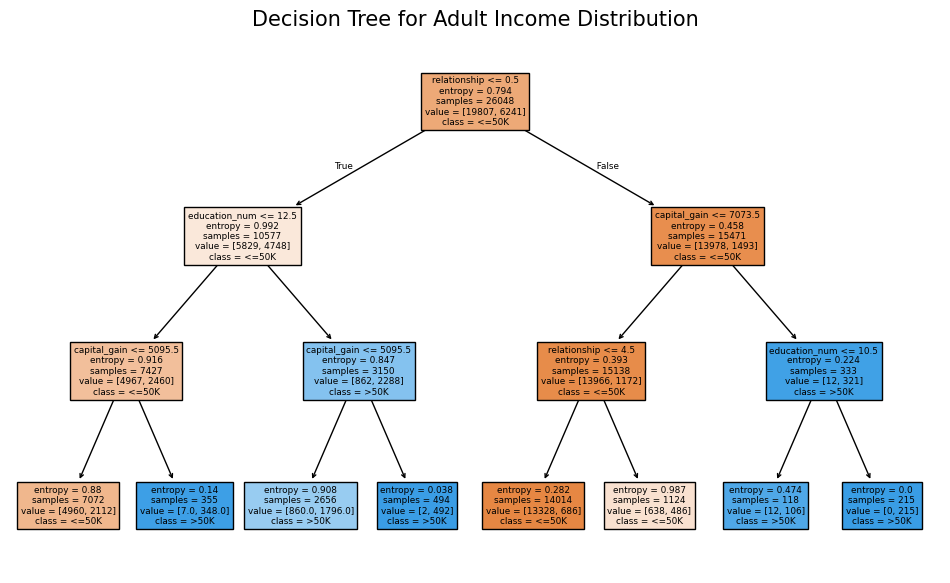

In [326]:
from sklearn import tree

# Plot the tree using the criterion entropy model
plt.figure(figsize=(12,7))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'])
plt.title("Decision Tree for Adult Income Distribution", fontsize=15)
plt.show()

2. Criterion Gini index

Defining the model

In [327]:
# Modelling using criterion gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the test set results

In [328]:
# Predict X-test with criterion gini model
y_pred_gini = clf_gini.predict(X_test)

Accuracy Score

In [329]:
# Accuracy score using y_test and y_pred
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Model accuracy score with criterion gini: {accuracy_gini * 100:.2f}%") # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion gini: 83.86%


Check for overfitting and underfitting

In [330]:
y_train_gini = clf_gini.predict(X_train)

# Accuracy for test and train using criterion gini model
test_accuracy_gini = accuracy_score(y_test, y_pred_gini)
training_accuracy_gini = accuracy_score(y_train, y_train_gini)

# Showing testing and training accuracy based on train and test data
print(f"Testing accuracy: {test_accuracy_gini * 100:.2f}%")
print(f"Testing accuracy: {training_accuracy_gini * 100:.2f}%")

Testing accuracy: 83.86%
Testing accuracy: 84.02%


Visualize decision trees

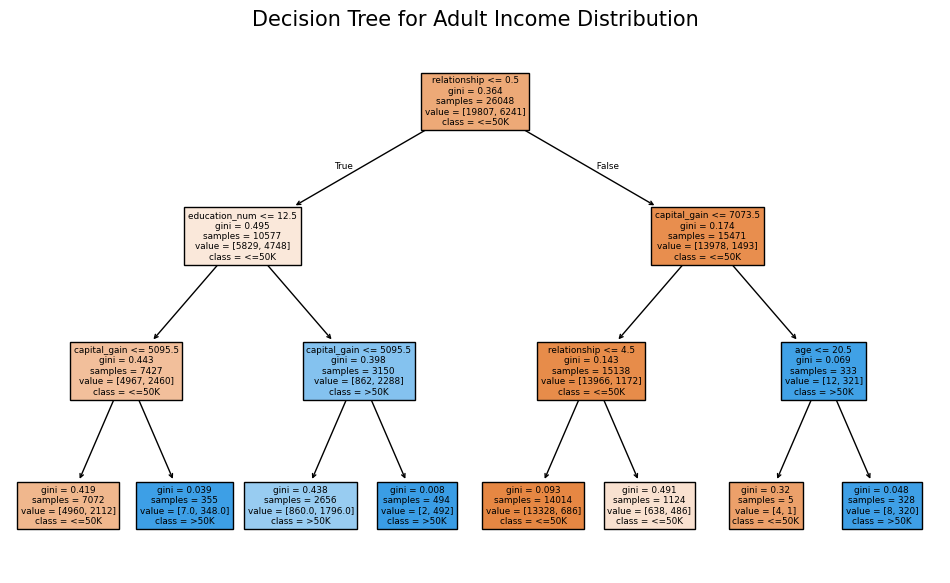

In [331]:
# Plot the tree for the criterion gini model
plt.figure(figsize=(12,7))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'])
plt.title("Decision Tree for Adult Income Distribution", fontsize=15)
plt.show()

Confusion matrix and classification report of criterion Entropy and Gini index

In [332]:
# Confusion matrix of criterion entropy and criterion gini model
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix (Entropy):\n", cm_entropy)
print("Confusion Matrix (Gini):\n", cm_gini)

Confusion Matrix (Entropy):
 [[4674  238]
 [ 813  787]]
Confusion Matrix (Gini):
 [[4674  238]
 [ 813  787]]


In [333]:
#g
# Classification report of criterion entropy and criterion gini model
clf_report_entropy = classification_report(y_test, y_pred_entropy)
clf_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", clf_report_entropy)
print("Classification Report Gini Index: \n", clf_report_gini)

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4912
           1       0.77      0.49      0.60      1600

    accuracy                           0.84      6512
   macro avg       0.81      0.72      0.75      6512
weighted avg       0.83      0.84      0.83      6512

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4912
           1       0.77      0.49      0.60      1600

    accuracy                           0.84      6512
   macro avg       0.81      0.72      0.75      6512
weighted avg       0.83      0.84      0.83      6512



Conclusion & Result

In [334]:
#h
# Result
# Both models have the same results, meaning that using either entropy or Gini made no difference in accuracy, precision, recall, and F1-score for this dataset.
# Both the models showing the same accuracy for training (84.02%) and testing data (83.86%).
# It ndicates that both algorithms perform well in predicting the given classes.

# Conclusion
# For this dataset, it doesn’t matter whether you choose entropy or Gini.
# Both methods perform equally well, so we can use either one without affecting the model’s accuracy.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [335]:
#a
nb_model = GaussianNB()

nb_model.fit(X_train, y_train) # Modelling using Naive Bayes

GaussianNB()

In [336]:
#b
# Predicting the test set results using Naive Bayes
y_pred_nb = nb_model.predict(X_test)

In [337]:
#c
# Showing accuracy score using y_test and y_pred
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb * 100:.2f}%")

#d
# Showing confusion matrix of Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm_nb)

Model accuracy score: 79.64%
Confusion Matrix:
 [[4672  240]
 [1086  514]]


In [338]:
#e
# Showing the classification report based on y test and y pred
clf_report_nb = classification_report(y_test, y_pred_nb)

print("Classification Report:\n", clf_report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      4912
           1       0.68      0.32      0.44      1600

    accuracy                           0.80      6512
   macro avg       0.75      0.64      0.66      6512
weighted avg       0.78      0.80      0.77      6512



In [339]:
#f
# Result
# The confusion matrix and classification report reveal that the model achieved an accuracy of 79.64%.  The model performs significantly better for class 0,
# with a high precision (0.81) and recall (0.95). However, its performance for class 1 is notably lower, with a precision of 0.68 and a recall of only 0.32.
# This suggests that the model struggles to accurately identify instances of class 1.

# Conclusion
# In conclusion, the model's performance is not good by its inability to correctly classify class 1 instances. Techniques like oversampling, undersampling,
# or using class weighting can be explored to balance the dataset. Additionally, experimenting with different algorithms or hyperparameter tuning might help
# enhance the model's ability to predict class 1 accurately.

## K-Nearest Neighbors


---

In [340]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Standardize the features with scaled data

In [341]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the classifier (choose K=5 as an example)

In [342]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Make predictions on the test data

In [343]:
y_pred_knn = knn.predict(X_test)

Accuracy Score

In [344]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

Accuracy: 81.94%


Confusion Matrix

In [345]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

# Printing the confusion matrix using KNN Classification

Confusion Matrix:
[[4441  471]
 [ 705  895]]


Classification Report

In [346]:
clf_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(clf_report_knn)

# Printing the classification report using KNN Classification

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4912
           1       0.66      0.56      0.60      1600

    accuracy                           0.82      6512
   macro avg       0.76      0.73      0.74      6512
weighted avg       0.81      0.82      0.81      6512



Result & Conclusion KNN

In [347]:
# Result and Conclusion KNN
# The confusion matrix and classification report show that the KNN model has achieved an overall accuracy of 81.94%. This means that the model correctly
# predicted 81.94% of the instances. For class 0, the model has a high precision (0.86) and recall (0.90), indicating that it's good at identifying true positives
# and minimizing false positives. On the other hand, for class 1, the model has lower precision (0.66) and recall (0.56), suggesting that it struggles
# with accurately identifying true positives and tends to have more false positives and false negatives.

## Entropy, Gini, NB, KNN

In [348]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Classification Report Entropy: \n", cm_entropy)
print("Classification Report Gini Index: \n", cm_gini)
print("Classification Report Naive Bayes: \n", cm_nb)
print("Classification Report Random Forest: \n", cm_knn)

Classification Report Entropy: 
 [[4674  238]
 [ 813  787]]
Classification Report Gini Index: 
 [[4674  238]
 [ 813  787]]
Classification Report Naive Bayes: 
 [[4672  240]
 [1086  514]]
Classification Report Random Forest: 
 [[4441  471]
 [ 705  895]]


In [349]:
clf_report_entropy = classification_report(y_test, y_pred_entropy)
clf_report_gini = classification_report(y_test, y_pred_gini)
clf_report_nb = classification_report(y_test, y_pred_nb)
clf_report_knn = classification_report(y_test, y_pred_knn)

print("Classification Report Entropy: \n", clf_report_entropy)
print("Classification Report Gini Index: \n", clf_report_gini)
print("Classification Report Naive Bayes: \n", clf_report_nb)
print("Classification Report Random Forest: \n", clf_report_knn)

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4912
           1       0.77      0.49      0.60      1600

    accuracy                           0.84      6512
   macro avg       0.81      0.72      0.75      6512
weighted avg       0.83      0.84      0.83      6512

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4912
           1       0.77      0.49      0.60      1600

    accuracy                           0.84      6512
   macro avg       0.81      0.72      0.75      6512
weighted avg       0.83      0.84      0.83      6512

Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      4912
           1       0.68      0.32      0.44      1600

    accuracy                           0.80      6512
   macro avg       0.7

Conclusion

In [350]:
# Based on the classification reports, the Entropy and Gini models appear to be the best-performing models among the four evaluated. Both models achieve the highest
# accuracy (0.81), precision (0.83), recall (0.84), and F1-score (0.84). While the Random Forest model also performs well, it slightly lags behind in terms of accuracy
# and F1-score. The Naive Bayes model, on the other hand, shows lower performance across all metrics.
# Therefore, the Entropy and Gini models are the most suitable for this classification task due to their higher overall accuracy and balanced performance across both classes.